<h1>Logistic Regression </h1>


**Dokładność modelu: 0.7346**

**Raport klasyfikacji:**
              precision    recall  f1-score   support

         0.0       0.70      0.72      0.71     11821
         2.0       0.84      0.76      0.80     11990
         4.0       0.68      0.72      0.70     12039

    accuracy                           0.73     35850
   macro avg       0.74      0.73      0.74     35850
weighted avg       0.74      0.73      0.74     35850



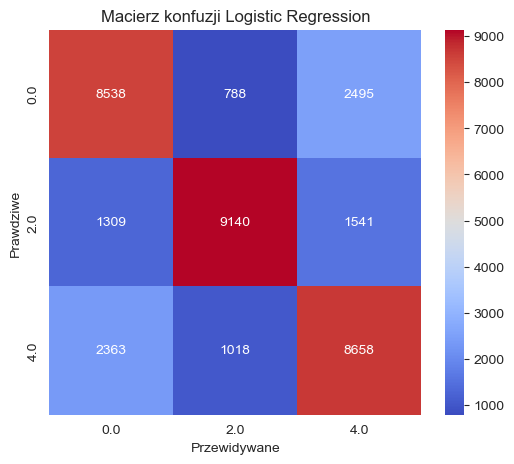


**Model i wektoryzator zapisane!**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from joblib import dump, load

# Wczytanie danych
df = pd.read_csv(r"C:\Users\User\PycharmProjects\sentiment\finaldata\przefiltrowanebezprezydentapowinnobycokdlaprostych.csv")  

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(df["text"], df["sentiment"], test_size=0.2, random_state=42)

# Tworzenie TF-IDF Vectorizera i przekształcenie danych
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Trening modelu Logistic Regression
model = LogisticRegression(max_iter=500)
model.fit(X_train_tfidf, y_train)

# Ewaluacja modelu
y_pred = model.predict(X_test_tfidf)

# Wyniki klasyfikacji
accuracy = accuracy_score(y_test, y_pred)
print(f"\n**Dokładność modelu: {accuracy:.4f}**\n")
print("**Raport klasyfikacji:**")
print(classification_report(y_test, y_pred))

# Macierz konfuzji
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Przewidywane")
plt.ylabel("Prawdziwe")
plt.title("Macierz konfuzji Logistic Regression")
plt.show()

# Zapisanie modelu + wektoryzatora
dump(model, "logistic_regression_model.joblib")
dump(vectorizer, "tfidf_vectorizer.joblib")
print("\n**Model i wektoryzator zapisane!**")

<h1>Naive Bayes</h1>

📊 Dokładność modelu: 0.7204

📜 Raport klasyfikacji:
               precision    recall  f1-score   support

         0.0       0.65      0.76      0.70     11821
         2.0       0.84      0.74      0.79     11990
         4.0       0.69      0.65      0.67     12039

    accuracy                           0.72     35850
   macro avg       0.73      0.72      0.72     35850
weighted avg       0.73      0.72      0.72     35850



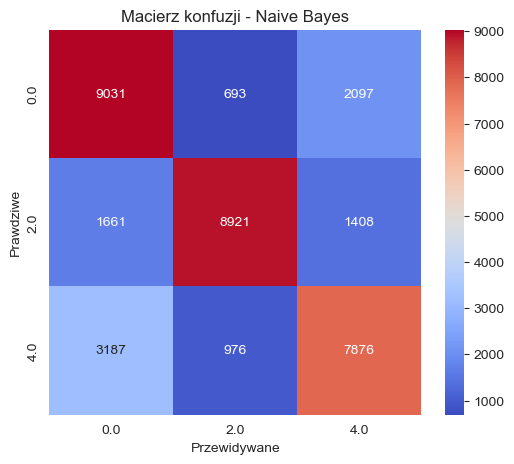

✅ Model Naive Bayes  zostały zapisane!


In [2]:
import pandas as pd
import numpy as np
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from joblib import load


df = pd.read_csv(r"C:\Users\User\PycharmProjects\sentiment\finaldata\przefiltrowanebezprezydentapowinnobycokdlaprostych.csv")  

X = df["text"]
y = df["sentiment"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




vectorizer = load(r"C:\Users\User\PycharmProjects\sentiment\models\tfidf_vectorizer.joblib")

#vectorizer = TfidfVectorizer(stop_words="english", max_features=10000)  
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

#trenowanie
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)


y_pred = nb_model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f"📊 Dokładność modelu: {accuracy:.4f}")
print("\n📜 Raport klasyfikacji:\n", classification_report(y_test, y_pred))


conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Przewidywane")
plt.ylabel("Prawdziwe")
plt.title("Macierz konfuzji - Naive Bayes")
plt.show()

model_path = r"C:\Users\User\PycharmProjects\sentiment\models\naive_bayes_model.pkl"
with open(model_path, "wb") as model_file:
    pickle.dump(nb_model, model_file)
    
print("Model Naive Bayes  zostały zapisane!")


<h1>Random Forest</h1>

📊 Dokładność modelu (Random Forest): 0.6479

📜 Raport klasyfikacji:
               precision    recall  f1-score   support

         0.0       0.59      0.68      0.63     11821
         2.0       0.89      0.57      0.70     11990
         4.0       0.57      0.69      0.63     12039

    accuracy                           0.65     35850
   macro avg       0.68      0.65      0.65     35850
weighted avg       0.68      0.65      0.65     35850



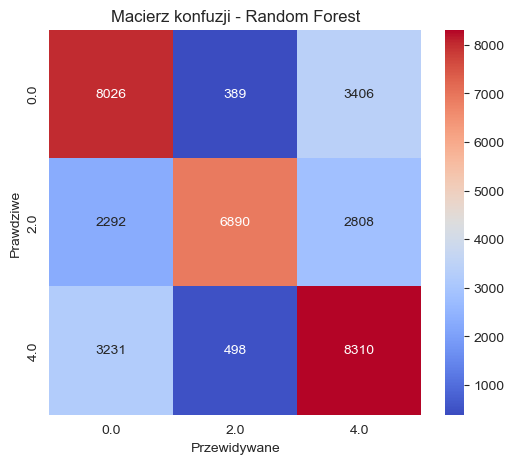

✅ Model Random Forest został zapisany!


In [1]:
import pandas as pd
import numpy as np
import pickle
from joblib import load, dump
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv(r"C:\Users\User\PycharmProjects\sentiment\finaldata\przefiltrowanebezprezydentapowinnobycokdlaprostych.csv")  # Podmień na swoją ścieżkę

X = df["text"]
y = df["sentiment"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


vectorizer = load(r"C:\Users\User\PycharmProjects\sentiment\models\tfidf_vectorizer.joblib")


X_train_tfidf = vectorizer.transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


rf_model = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42)
rf_model.fit(X_train_tfidf, y_train)


y_pred = rf_model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)

print(f"Dokładność modelu (Random Forest): {accuracy:.4f}")
print("\nRaport klasyfikacji:\n", classification_report(y_test, y_pred))


conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Przewidywane")
plt.ylabel("Prawdziwe")
plt.title("Macierz konfuzji - Random Forest")
plt.show()


model_path = r"C:\Users\User\PycharmProjects\sentiment\models\random_forest_model.pkl"
with open(model_path, "wb") as model_file:
    pickle.dump(rf_model, model_file)

print("✅ Model Random Forest został zapisany!")


<h1>XGBOOST</h1>

📊 Dokładność modelu (XGBoost): 0.6911

📜 Raport klasyfikacji:
               precision    recall  f1-score   support

         0.0       0.67      0.66      0.67     11821
         2.0       0.89      0.64      0.75     11990
         4.0       0.60      0.77      0.67     12039

    accuracy                           0.69     35850
   macro avg       0.72      0.69      0.69     35850
weighted avg       0.72      0.69      0.69     35850



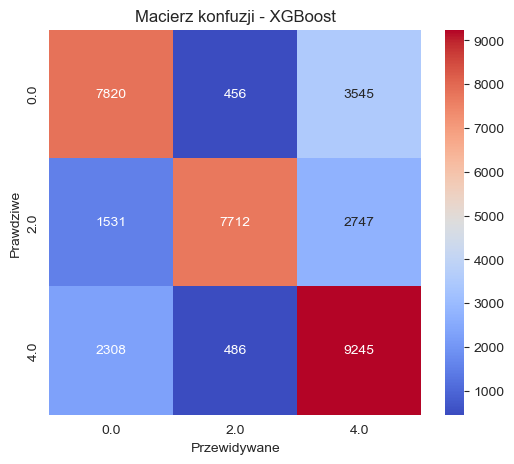

✅ Model XGBoost został zapisany!


In [5]:
import pandas as pd
import numpy as np
import pickle
import xgboost as xgb
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import load, dump


df = pd.read_csv(r"C:\Users\User\PycharmProjects\sentiment\finaldata\przefiltrowanebezprezydentapowinnobycokdlaprostych.csv")  

label_mapping = {0: 0, 2: 1, 4: 2}
reverse_mapping = {0: 0, 1: 2, 2: 4}


X = df["text"]
y = df["sentiment"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train_mapped = y_train.map(label_mapping)
y_test_mapped = y_test.map(label_mapping)

vectorizer = load(r"C:\Users\User\PycharmProjects\sentiment\models\tfidf_vectorizer.joblib")
X_train_tfidf = vectorizer.transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)




xgb_model = xgb.XGBClassifier(
    objective="multi:softmax",  
    num_class=3,  
    eval_metric="mlogloss",  
    n_estimators=300,
    max_depth=8,
     subsample=0.8,  
    learning_rate=0.1,
    random_state=42
)

xgb_model.fit(X_train_tfidf, y_train_mapped)  


y_pred_mapped = xgb_model.predict(X_test_tfidf)
y_pred = pd.Series(y_pred_mapped).map(reverse_mapping)

accuracy = accuracy_score(y_test, y_pred)
print(f"Dokładność modelu (XGBoost): {accuracy:.4f}")
print("\nRaport klasyfikacji:\n", classification_report(y_test, y_pred))


conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Przewidywane")
plt.ylabel("Prawdziwe")
plt.title("Macierz konfuzji - XGBoost")
plt.show()


model_path = r"C:\Users\User\PycharmProjects\sentiment\models\xgboost_model.pkl"
with open(model_path, "wb") as model_file:
    pickle.dump(xgb_model, model_file)

print("Model XGBoost został zapisany!")


<h1>XGBoost tuningowany  </h1>

C:\Users\User\miniconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:35:40] WARNING: D:\bld\xgboost-split_1738880170463\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📊 Dokładność modelu (XGBoost): 0.6804

📜 Raport klasyfikacji:
               precision    recall  f1-score   support

         0.0       0.66      0.64      0.65     11821
         2.0       0.89      0.63      0.74     11990
         4.0       0.58      0.77      0.66     12039

    accuracy                           0.68     35850
   macro avg       0.71      0.68      0.68     35850
weighted avg       0.71      0.68      0.68     35850



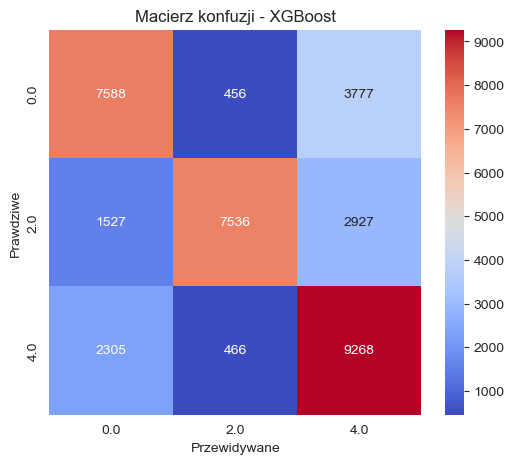

✅ Model XGBoost i encoder etykiet zapisane!


In [7]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib


df = pd.read_csv(r"C:\Users\User\PycharmProjects\sentiment\finaldata\przefiltrowanebezprezydentapowinnobycokdlaprostych.csv")

X = df["text"]
y = df["sentiment"]


#konwersja 
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


vectorizer = joblib.load(r"C:\Users\User\PycharmProjects\sentiment\models\tfidf_vectorizer.joblib")
X_train_tfidf = vectorizer.transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="mlogloss")
xgb_model.fit(X_train_tfidf, y_train)


y_pred = xgb_model.predict(X_test_tfidf)


y_pred_original = label_encoder.inverse_transform(y_pred)
y_test_original = label_encoder.inverse_transform(y_test)


accuracy = accuracy_score(y_test_original, y_pred_original)
print(f"Dokładność modelu (XGBoost): {accuracy:.4f}")
print("\nRaport klasyfikacji:\n", classification_report(y_test_original, y_pred_original))


conf_matrix = confusion_matrix(y_test_original, y_pred_original)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm", xticklabels=np.unique(y_test_original), yticklabels=np.unique(y_test_original))
plt.xlabel("Przewidywane")
plt.ylabel("Prawdziwe")
plt.title("Macierz konfuzji - XGBoost")
plt.show()


joblib.dump(xgb_model, r"C:\Users\User\PycharmProjects\sentiment\models\xgboost_model.joblib")
joblib.dump(label_encoder, r"C:\Users\User\PycharmProjects\sentiment\models\label_encoder.joblib")
print(" Model XGBoost i encoder etykiet zapisane!")


<h1>Stakowanie</h1>

C:\Users\User\miniconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:51:17] WARNING: D:\bld\xgboost-split_1738880170463\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\User\miniconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:52:51] WARNING: D:\bld\xgboost-split_1738880170463\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\User\miniconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:53:43] WARNING: D:\bld\xgboost-split_1738880170463\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\User\miniconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:54:34] WARNING: D:\bld\xgboost-split_1738880170463\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\User\miniconda3

📊 Dokładność modelu (Stacking): 0.7394

📜 Raport klasyfikacji:
               precision    recall  f1-score   support

         0.0       0.70      0.73      0.71     11821
         2.0       0.85      0.77      0.80     11990
         4.0       0.69      0.72      0.70     12039

    accuracy                           0.74     35850
   macro avg       0.74      0.74      0.74     35850
weighted avg       0.74      0.74      0.74     35850



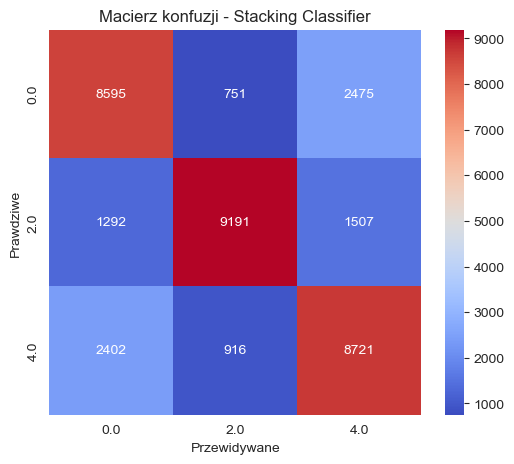

✅ Model Stacking został zapisany!


In [17]:
import pandas as pd
import numpy as np
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import load


df = pd.read_csv(r"C:\Users\User\PycharmProjects\sentiment\finaldata\przefiltrowanebezprezydentapowinnobycokdlaprostych.csv")

X = df["text"]
y = df["sentiment"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


vectorizer = load(r"C:\Users\User\PycharmProjects\sentiment\models\tfidf_vectorizer.joblib")
X_train_tfidf = vectorizer.transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# stakowanie modeli; Bayes, logistic Regresion i XGboost
base_models = [
    ('nb', MultinomialNB()),  # Naive Bayes
    ('lr', LogisticRegression(max_iter=1000)),  # Logistic Regression
    ('xgb', XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='mlogloss'))  # XGBoost
]

# Meta-model (Final Estimator) – Logistic Regression
meta_model = LogisticRegression(max_iter=1000)

#Stacking Classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)
stacking_model.fit(X_train_tfidf, y_train)


y_pred = stacking_model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f"📊 Dokładność modelu (Stacking): {accuracy:.4f}")
print("\n📜 Raport klasyfikacji:\n", classification_report(y_test, y_pred))


conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Przewidywane")
plt.ylabel("Prawdziwe")
plt.title("Macierz konfuzji - Stacking Classifier")
plt.show()


model_path = r"C:\Users\User\PycharmProjects\sentiment\models\stacking_model.pkl"
with open(model_path, "wb") as model_file:
    pickle.dump(stacking_model, model_file)

print("✅ Model Stacking został zapisany!")
